# Лабораторная работа 2. Цифровая обработка изображений 

## Задание: Реализовать эквализацию изображения

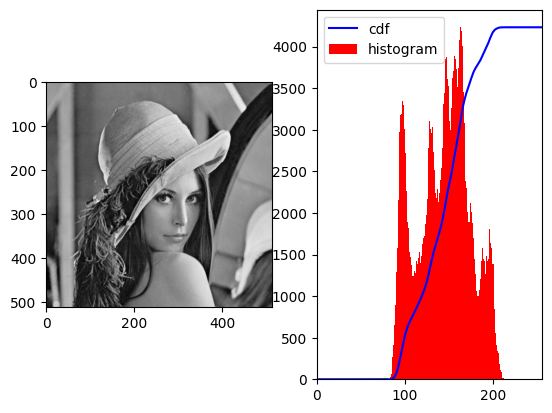

In [20]:
import numpy as np
import cv2 as cv
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

# Загружаем изображение
img = cv.imread('../images/lenna_bad.png', cv.IMREAD_GRAYSCALE)

hist, bins = np.histogram(img.flatten(), 256, [0,256]) # вычисляем гистограмму
cdf = hist.cumsum() # считаем сововкупную сумму элементов (распределение)
cdf_normalized = cdf * float(hist.max()) / cdf.max() # нормализуем распределение

# выводим результаты
gs = plt.GridSpec(1, 2)
plt.subplot(gs[0])
plt.imshow(img, cmap="gray")
plt.subplot(gs[1])
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

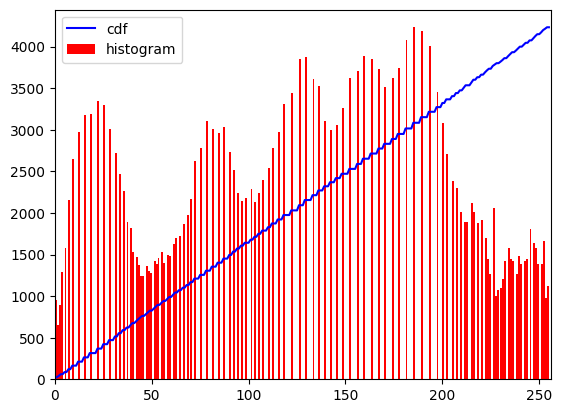

In [21]:
# необходимо выполнить эквализацию (выравнивание)
# произведем необходимые вычисления и посмотрим, как после этого будет выглядеть гистограмма

cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

img2 = cdf[img]

# еще раз выполняем необходимые вычисления
hist, bins = np.histogram(img2.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# выводим результат
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

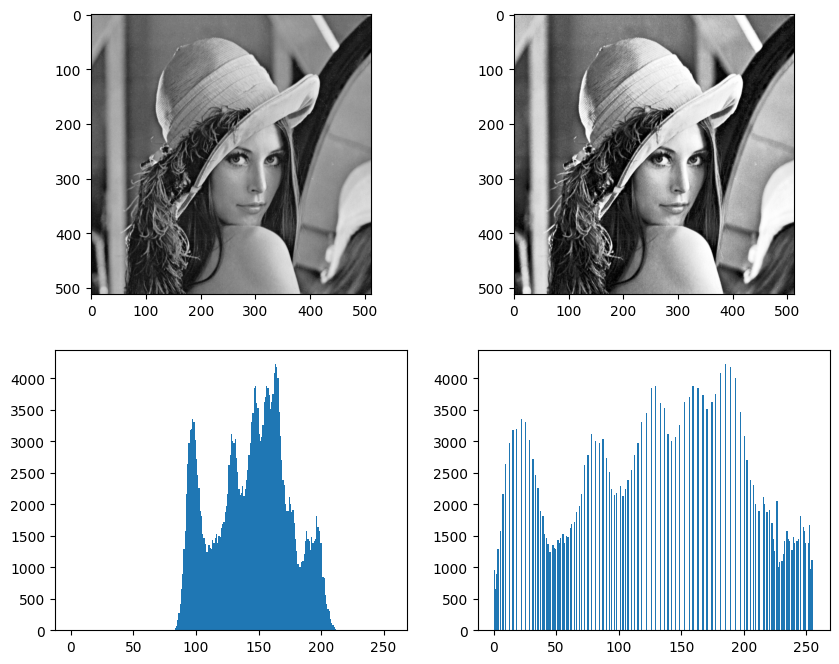

In [23]:
# сравним результат до и после

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(img,cmap="gray")
plt.subplot(gs[1])
plt.imshow(img2,cmap="gray")
plt.subplot(gs[2])
plt.hist(img.reshape(-1), 256, [0,256])
plt.subplot(gs[3])
plt.hist(img2.reshape(-1), 256, [0,256])
plt.show()

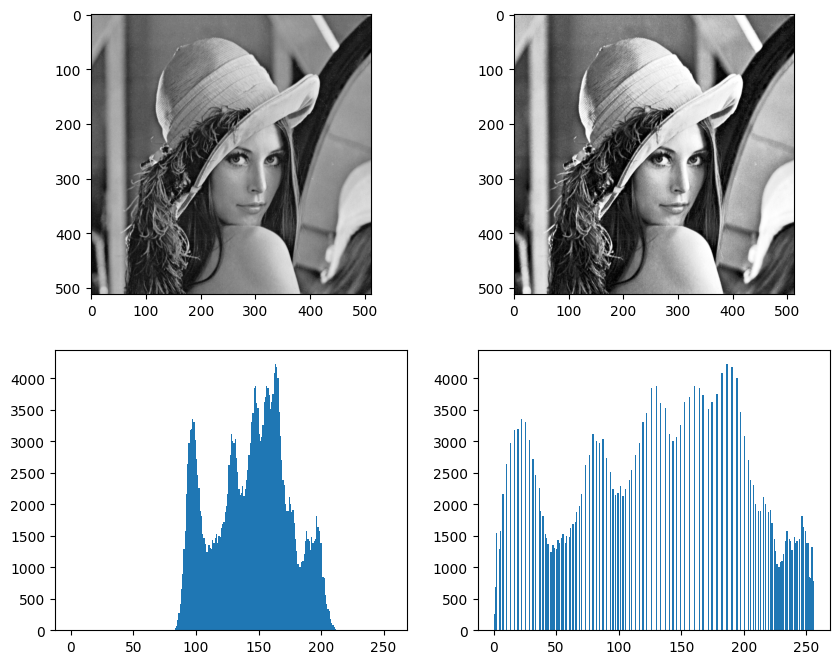

In [24]:
# для проверки выполним эквализацию с помощью готовой функции equalizeHist
img = cv.imread('../images/lenna_bad.png', cv.IMREAD_GRAYSCALE)
equalized = cv.equalizeHist(img)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(img,cmap="gray")
plt.subplot(gs[1])
plt.imshow(equ,cmap="gray")
plt.subplot(gs[2])
plt.hist(img.reshape(-1), 256, [0,256])
plt.subplot(gs[3])
plt.hist(equalized.reshape(-1), 256, [0,256])
plt.show()